In [1]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.models import load_model
from keras.models import save_model
from keras.layers import BatchNormalization
from keras.layers import Activation
from cv2 import imread
from cv2 import resize
import cv2
from matplotlib import pyplot as plt
%matplotlib inline
import pickle
import numpy as np
from sklearn.model_selection import train_test_split
from keras import backend as K
import tensorflow as tf
from keras.utils.generic_utils import get_custom_objects

Using TensorFlow backend.


In [2]:
def create_Model():
    model = Sequential()
    model.add(Conv2D(16,(5,5),padding='valid',input_shape=(80,80,3)))
    model.add(Activation('tanh'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.2))
    model.add(Conv2D(32,(3,3),padding='valid'))
    model.add(Activation('tanh'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.2))
    model.add(Conv2D(64,(3,3),padding='valid'))
    model.add(Activation('tanh'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.2))
    model.add(Conv2D(64,(2,2),padding='valid'))
    model.add(Activation('tanh'))
    model.add(Flatten())
    model.add(Dense(10,activation='linear'))
    model.compile(loss='mean_squared_error',optimizer='adam')
    return model

In [3]:
def train(X_train, y_train):
    model = create_Model()
    model.fit(X_train,y_train,epochs=12,batch_size=128)
    model.save('landmark.h5')

In [4]:
def test(X_test, y_test):
    try:
        model = load_model('landmark.h5')
        pred = model.predict(X_test, batch_size=128,)
        print(model.evaluate(X_test, y_test, batch_size=128))
        return pred
    except:
        print('Not trained')

In [5]:
def make_data():
    X_train=[]
    y_train=[]
    X_test=[]
    y_test=[]
    file=open('data.txt','r')
    i=0
    for line in file:
        line=line.strip()
        a=line.split()
        path=a[0]
        image=imread(path)
        if i<3000:
            X_train.append(image)
            y_train.append(list(map(float,a[1:11])))
        elif i<4500:
            X_test.append(image)
            y_test.append(list(map(float,a[1:11])))
        i+=1
    file.close()
    return np.asarray(X_train),np.asarray(y_train),np.asarray(X_test),np.asarray(y_test)

In [6]:
X_train,y_train,X_test,y_test=make_data()
train(X_train,y_train)

Epoch 1/12
3000/3000 [==============================] - 35s 12ms/step - loss: 483.0451
Epoch 2/12
3000/3000 [==============================] - 30s 10ms/step - loss: 23.4308
Epoch 3/12
3000/3000 [==============================] - 31s 10ms/step - loss: 3.7826
Epoch 4/12
3000/3000 [==============================] - 31s 10ms/step - loss: 2.1950
Epoch 5/12
3000/3000 [==============================] - 32s 11ms/step - loss: 2.1019
Epoch 6/12
3000/3000 [==============================] - 33s 11ms/step - loss: 2.0908
Epoch 7/12
3000/3000 [==============================] - 31s 10ms/step - loss: 2.0867
Epoch 8/12
3000/3000 [==============================] - 32s 11ms/step - loss: 2.0896
Epoch 9/12
3000/3000 [==============================] - 31s 10ms/step - loss: 2.0914
Epoch 10/12
3000/3000 [==============================] - 31s 10ms/step - loss: 2.0876
Epoch 11/12
3000/3000 [==============================] - 33s 11ms/step - loss: 2.0864
Epoch 12/12
3000/3000 [==============================] - 33s

In [7]:
pred = test(X_test,y_test)

1500/1500 [==============================] - 7s 5ms/step
12.7172990875


In [8]:
np.save('output.npy',pred)

[ 33.704319    46.94108582  40.29386139  34.84019852  46.34638596
  36.4274025   36.15063858  43.82395554  50.66559982  50.4405899 ]


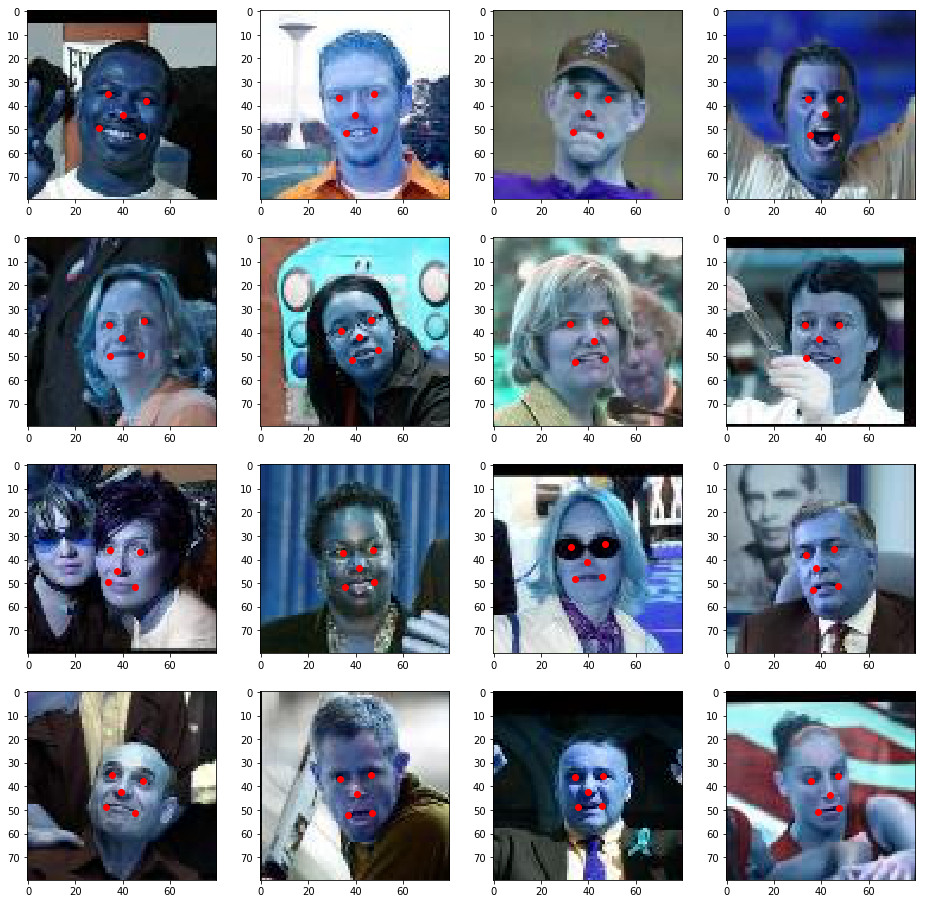

In [17]:
a=np.ndarray.tolist(pred)
figure=plt.figure(figsize=(16,16))
columns = 4
rows = 4
for i in range(1,columns*rows+1):
    figure.add_subplot(rows,columns,i)
    plt.imshow(X_test[i])
    plt.plot(y_test[i][:5],y_test[i][5:],'ro')
plt.show()